In [154]:
import pandas as pd
from wordcloud import WordCloud


df = pd.read_excel('google_Stardew_Valley_reviews.xlsx')

df


,날짜,평점,리뷰 내용
0,2024년 2월 18일,3점,게임은 정말 재밌는데 앱으로 넘어오면서 최적화가 부족한 듯함. 스팀에서도 구매해서 ...
1,2024년 1월 23일,4점,오류 정리(해골광산에서 공격과 음식을 같이 하면 렉걸림 그럼 결국 피안차고 음식잃고...
2,2024년 2월 5일,4점,너무 재미있어요 호감도이벤트 확인이랑 광산 마을회관 채우기 낚시 주컨텐츠인 농사 채...
3,2023년 11월 24일,3점,1. 게임시작 초반에는 터치감이 좋은데 중간부터는 터치감이 안좋아지고 렉이 종종 걸...
4,2023년 12월 6일,5점,게임 정말 재밌게 하고 있는 유저입니다. 시작한지 얼마 안되서 그런건지는 잘 모르겠...
...,...,...,...
655,2023년 1월 22일,4점,업데이트 이후 화면에 실선이 생겨요.. 그리고 날씨박스도 너무커요ㅠㅠ 수정부탁드립니다..
656,2023년 1월 27일,5점,난생 처음 해보는데여. 생각보다 재밌고 모바일로 할만하네요. ㅋㅋㅋㅋ 모바일로 이런...
657,2020년 9월 1일,4점,엄청 노가다 게임이긴하지만 스토리도 재밌고 퀘스트깨는 재미도잇음 근데 멀티가안되서 ...
658,2021년 8월 1일,5점,재미있는데 모바일경우는 멀티 불가능이라 제작자님께서 말씀하셔서 멀티는 포기하심이 좋...


In [155]:
df['리뷰 내용'] = df['리뷰 내용'].str.replace('[^가-힣]', ' ', regex = True)
df['리뷰 내용']


0      게임은 정말 재밌는데 앱으로 넘어오면서 최적화가 부족한 듯함  스팀에서도 구매해서 ...
1      오류 정리 해골광산에서 공격과 음식을 같이 하면 렉걸림 그럼 결국 피안차고 음식잃고...
2      너무 재미있어요 호감도이벤트 확인이랑 광산 마을회관 채우기 낚시 주컨텐츠인 농사 채...
3         게임시작 초반에는 터치감이 좋은데 중간부터는 터치감이 안좋아지고 렉이 종종 걸...
4      게임 정말 재밌게 하고 있는 유저입니다  시작한지 얼마 안되서 그런건지는 잘 모르겠...
                             ...                        
655    업데이트 이후 화면에 실선이 생겨요   그리고 날씨박스도 너무커요   수정부탁드립니다  
656    난생 처음 해보는데여  생각보다 재밌고 모바일로 할만하네요       모바일로 이런...
657    엄청 노가다 게임이긴하지만 스토리도 재밌고 퀘스트깨는 재미도잇음 근데 멀티가안되서 ...
658    재미있는데 모바일경우는 멀티 불가능이라 제작자님께서 말씀하셔서 멀티는 포기하심이 좋...
659    귀농게임의 절정  단순히 농사만 있는게 아니라서 더욱 완벽    처럼 멀티모드만 추...
Name: 리뷰 내용, Length: 660, dtype: object

In [156]:
X = df['리뷰 내용']

In [157]:

from soynlp.noun import LRNounExtractor # noun extracter v1
noun_extractor = LRNounExtractor()
nouns = noun_extractor.train_extract(X) # list of str like

[Noun Extractor] used default noun predictor; Sejong corpus predictor
[Noun Extractor] used noun_predictor_sejong
[Noun Extractor] All 2398 r features was loaded
[Noun Extractor] scanning was done (L,R) has (1906, 1049) tokens
[Noun Extractor] building L-R graph was done
[Noun Extractor] 339 nouns are extracted


In [158]:
!apt -qq -y install fonts-nanum

The operation couldn’t be completed. Unable to locate a Java Runtime that supports apt.
Please visit http://www.java.com for information on installing Java.



In [159]:
print(list((nouns.keys()))[:200]) #v1 버전으로 추출한 명사 예시입니다

['시작', '완벽', '하게', '진짜', '이전', '위치', '동물', '실망', '당황', '음식', '검색', '인벤', '다시', '생성', '하나', '나중', '멀티', '부족', '주민', '왼쪽', '예전', '호감', '결제', '로빈', '해야', '수확', '고양', '공략', '버전', '가을', '도끼', '구매', '만족', '나무', '필요', '하루', '영어', '설치', '피씨', '곡괭', '주변', '확인', '불편', '소리', '마음', '기대', '진행', '영상', '영화', '차이', '밸리', '다양', '확장', '느낌', '대답', '안보', '플레', '힐링', '축소', '단점', '단순', '패치', '보상', '다운', '부탁', '있고', '년차', '컴터', '침대', '자신', '겨울', '불가', '표시', '그것', '무료', '업뎃', '동숲', '작물', '여태', '아이', '하고', '바람', '중독', '이유', '이거', '가능', '좋아', '계속', '완성', '추천', '제외', '변경', '적용', '이번', '정도', '방법', '스킵', '가지', '복구', '도박', '계정', '가격', '이동', '조정', '한번', '상황', '등등', '번역', '소소', '버튼', '환불', '비슷', '상자', '사랑', '자동', '선물', '지루', '이름', '기증', '수정', '이상', '존재', '이용', '지원', '후반', '캐릭', '상태', '배경', '백업', '무한', '혹시', '버그', '글씨', '대화', '실행', '시간', '게임', '터치', '모드', '자리', '스팀', '친구', '초반', '스듀', '발생', '감사', '경우', '이것', '파일', '강추', '클릭', '픽셀', '툴바', '최근', '서버', '설명', '고민', '자유', '포기', '글자', '활성', '계절', '조작', '오류', '사이', '광산', '번들

In [160]:
# Import necessary libraries
from soynlp.noun import LRNounExtractor
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 명사 추출기를 초기화합니다.
noun_extractor = LRNounExtractor()
nouns = noun_extractor.train_extract(X)

# 명사와 그 빈도를 딕셔너리로 추출합니다.
frequencies = {noun: score.frequency for noun, score in nouns.items()}



[Noun Extractor] used default noun predictor; Sejong corpus predictor
[Noun Extractor] used noun_predictor_sejong
[Noun Extractor] All 2398 r features was loaded
[Noun Extractor] scanning was done (L,R) has (1906, 1049) tokens
[Noun Extractor] building L-R graph was done
[Noun Extractor] 339 nouns are extracted


In [161]:
if '하나' in frequencies:
    del frequencies['하나']


In [162]:
if '게임' in frequencies:
    del frequencies['게임']


In [163]:
if '분들' in frequencies:
    del frequencies['분들']


In [164]:
if '마크' in frequencies:
    del frequencies['마크']


In [165]:
if '플레이' in frequencies:
    del frequencies['플레이']


In [166]:
frequencies

{'시작': 35,
 '완벽': 12,
 '하게': 10,
 '진짜': 108,
 '이전': 16,
 '위치': 10,
 '동물': 11,
 '실망': 3,
 '당황': 3,
 '음식': 2,
 '검색': 5,
 '인벤': 6,
 '다시': 94,
 '생성': 5,
 '나중': 5,
 '멀티': 166,
 '부족': 8,
 '주민': 3,
 '왼쪽': 4,
 '예전': 5,
 '호감': 0,
 '결제': 6,
 '로빈': 11,
 '해야': 10,
 '수확': 7,
 '고양': 0,
 '공략': 16,
 '버전': 67,
 '가을': 3,
 '도끼': 5,
 '구매': 25,
 '만족': 6,
 '나무': 6,
 '필요': 8,
 '하루': 28,
 '영어': 13,
 '설치': 22,
 '피씨': 9,
 '곡괭': 0,
 '주변': 3,
 '확인': 14,
 '불편': 59,
 '소리': 9,
 '마음': 20,
 '기대': 8,
 '진행': 17,
 '영상': 6,
 '영화': 2,
 '차이': 5,
 '밸리': 13,
 '다양': 15,
 '확장': 5,
 '느낌': 18,
 '대답': 5,
 '안보': 14,
 '플레': 1,
 '힐링': 35,
 '축소': 6,
 '단점': 20,
 '단순': 4,
 '패치': 5,
 '보상': 5,
 '다운': 7,
 '부탁': 32,
 '있고': 23,
 '년차': 23,
 '컴터': 5,
 '침대': 7,
 '자신': 6,
 '겨울': 8,
 '불가': 2,
 '표시': 7,
 '그것': 15,
 '무료': 4,
 '업뎃': 46,
 '동숲': 5,
 '작물': 10,
 '여태': 4,
 '아이': 6,
 '하고': 127,
 '바람': 6,
 '중독': 5,
 '이유': 9,
 '이거': 24,
 '가능': 44,
 '좋아': 43,
 '계속': 62,
 '완성': 6,
 '추천': 25,
 '제외': 5,
 '변경': 10,
 '적용': 9,
 '이번': 21,
 '정도': 33,
 '방법': 13,
 '스킵

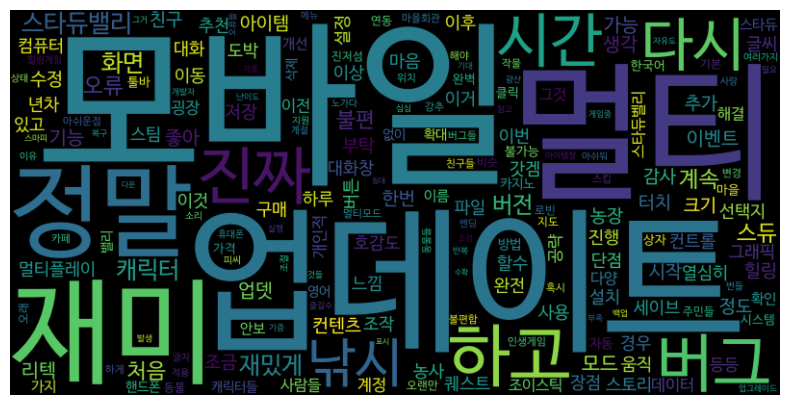

In [167]:
# 워드 클라우드를 생성합니다.
wordcloud = WordCloud(font_path='../../Library/fonts/NanumBarunGothic.otf', width=800, height=400).generate_from_frequencies(frequencies)

# 워드 클라우드를 표시합니다.
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # 축 번호와 틱을 끕니다.
plt.show()
